* **Basic EDA**
    * Missing Data
    * Dublicate data
    * Outliers or Anomalies
    * Data Visualization
    * Feature Encoding
    * Feature Selection

* **Model Building**
    * Seperate independent and Dependent data
    * Split data into training and testing
    * Model selection
    * Model Training
    * Model Prediction
    * Model Evaluation


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


import xgboost
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project /loan_detection.csv')
df

age  campaign  pdays  previous  no_previous_contact  not_working  \
0       56         1    999         0                    1            0   
1       57         1    999         0                    1            0   
2       37         1    999         0                    1            0   
3       40         1    999         0                    1            0   
4       56         1    999         0                    1            0   
...    ...       ...    ...       ...                  ...          ...   
41183   73         1    999         0                    1            1   
41184   46         1    999         0                    1            0   
41185   56         2    999         0                    1            1   
41186   44         1    999         0                    1            0   
41187   74         3    999         1                    1            1   

       job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  ...  \
0               0                0                 0              1  ...   
1               0                0                 0              0  ...   
2               0                0                 0              0  ...   
3               1                0                 0              0  ...   
4               0                0                 0              0  ...   
...           ...              ...               ...            ...  ...   
41183           0                0                 0              0  ...   
41184           0                1                 0              0  ...   
41185           0                0                 0              0  ...   
41186           0                0                 0              0  ...   
41187           0                0                 0              0  ...   

       month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  \
0              0                0                1                0   
1              0                0                1                0   
2              0                0                1                0   
3              0                0                1                0   
4              0                0                1                0   
...          ...              ...              ...              ...   
41183          0                1                0                0   
41184          0                1                0                0   
41185          0                1                0                0   
41186          0                1                0                0   
41187          0                1                0                0   

       day_of_week_tue  day_of_week_wed  poutcome_failure  \
0                    0                0                 0   
1                    0                0                 0   
2                    0                0                 0   
3                    0                0                 0   
4                    0                0                 0   
...                ...              ...               ...   
41183                0                0                 0   
41184                0                0                 0   
41185                0                0                 0   
41186                0                0                 0   
41187                0                0                 1   

       poutcome_nonexistent  poutcome_success  Loan_Status_label  
0                         1                 0                  0  
1                         1                 0                  0  
2                         1                 0                  0  
3                         1                 0                  0  
4                         1                 0                  0  
...                     ...               ...                ...  
41183                     1                 0                  1  
41184                     1                 0                  0  
4118

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            41188 non-null  int64
 1   campaign                       41188 non-null  int64
 2   pdays                          41188 non-null  int64
 3   previous                       41188 non-null  int64
 4   no_previous_contact            41188 non-null  int64
 5   not_working                    41188 non-null  int64
 6   job_admin.                     41188 non-null  int64
 7   job_blue-collar                41188 non-null  int64
 8   job_entrepreneur               41188 non-null  int64
 9   job_housemaid                  41188 non-null  int64
 10  job_management                 41188 non-null  int64
 11  job_retired                    41188 non-null  int64
 12  job_self-employed              41188 non-null  int64
 13  job_services    

In [6]:
df.duplicated().sum()

2417

In [7]:
df.isnull().sum()

age                              0
campaign                         0
pdays                            0
previous                         0
no_previous_contact              0
not_working                      0
job_admin.                       0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_divorced                 0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.4y               0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate             0
education_professional.course    0
education_university.degree      0
education_unknown                0
default_no                       0
default_unknown                  0
default_yes                      0
housing_no                       0
housing_unknown                  0
housing_yes                      0
loan_no                          0
loan_unknown                     0
loan_yes                         0
contact_cellular                 0
contact_telephone                0
month_apr                        0
month_aug                        0
month_dec                        0
month_jul                        0
month_jun                        0
month_mar                        0
month_may                        0
month_nov                        0
month_oct                        0
month_sep                        0
day_of_week_fri                  0
day_of_week_mon                  0
day_of_week_thu                  0
day_of_week_tue                  0
day_of_week_wed                  0
poutcome_failure                 0
poutcome_nonexistent             0
poutcome_success                 0
Loan_Status_label                0
dtype: int64

In [8]:
df.isnull().sum()

age                              0
campaign                         0
pdays                            0
previous                         0
no_previous_contact              0
not_working                      0
job_admin.                       0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_divorced                 0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.4y               0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate             0
education_professional.course    0
education_university.degree      0
education_unknown                0
default_no                       0
default_unknown                  0
default_yes                      0
housing_no                       0
housing_unknown                  0
housing_yes                      0
loan_no                          0
loan_unknown                     0
loan_yes                         0
contact_cellular                 0
contact_telephone                0
month_apr                        0
month_aug                        0
month_dec                        0
month_jul                        0
month_jun                        0
month_mar                        0
month_may                        0
month_nov                        0
month_oct                        0
month_sep                        0
day_of_week_fri                  0
day_of_week_mon                  0
day_of_week_thu                  0
day_of_week_tue                  0
day_of_week_wed                  0
poutcome_failure                 0
poutcome_nonexistent             0
poutcome_success                 0
Loan_Status_label                0
dtype: int64

In [9]:
df.nunique()

age                              78
campaign                         42
pdays                            27
previous                          8
no_previous_contact               2
not_working                       2
job_admin.                        2
job_blue-collar                   2
job_entrepreneur                  2
job_housemaid                     2
job_management                    2
job_retired                       2
job_self-employed                 2
job_services                      2
job_student                       2
job_technician                    2
job_unemployed                    2
job_unknown                       2
marital_divorced                  2
marital_married                   2
marital_single                    2
marital_unknown                   2
education_basic.4y                2
education_basic.6y                2
education_basic.9y                2
education_high.school             2
education_illiterate              2
education_professional.course     2
education_university.degree       2
education_unknown                 2
default_no                        2
default_unknown                   2
default_yes                       2
housing_no                        2
housing_unknown                   2
housing_yes                       2
loan_no                           2
loan_unknown                      2
loan_yes                          2
contact_cellular                  2
contact_telephone                 2
month_apr                         2
month_aug                         2
month_dec                         2
month_jul                         2
month_jun                         2
month_mar                         2
month_may                         2
month_nov                         2
month_oct                         2
month_sep                         2
day_of_week_fri                   2
day_of_week_mon                   2
day_of_week_thu                   2
day_of_week_tue                   2
day_of_week_wed                   2
poutcome_failure                  2
poutcome_nonexistent              2
poutcome_success                  2
Loan_Status_label                 2
dtype: int64

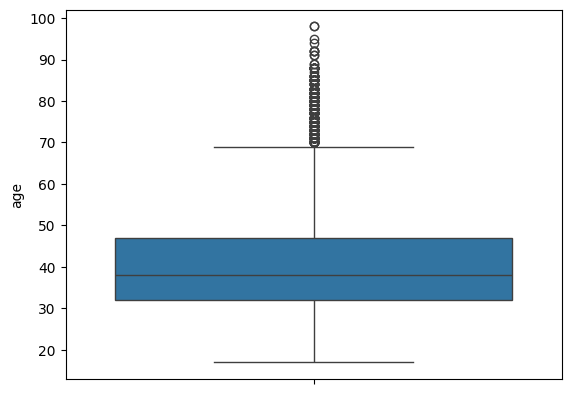

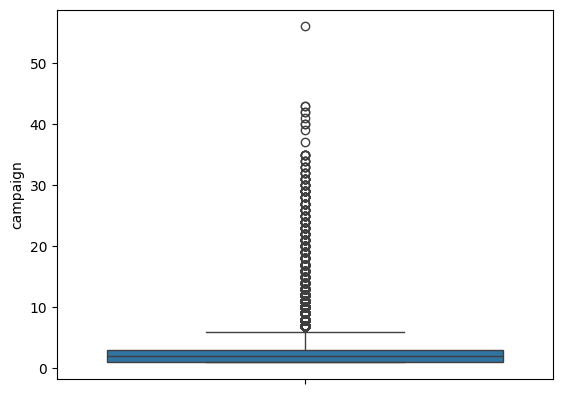

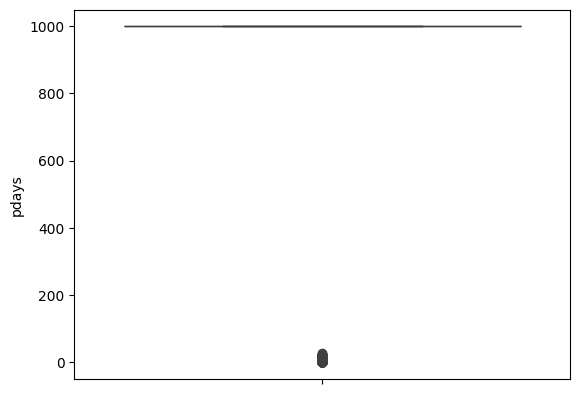

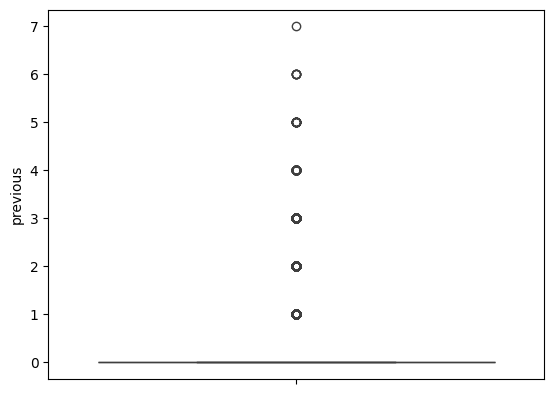

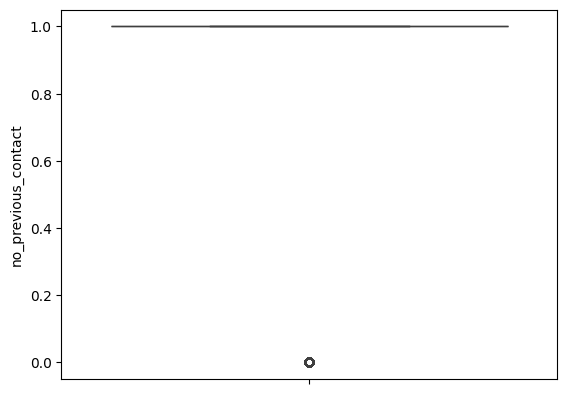

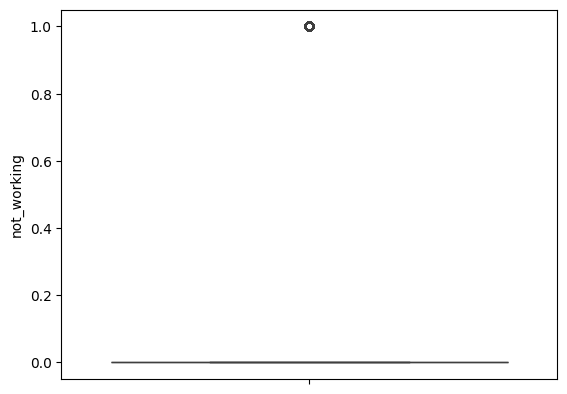

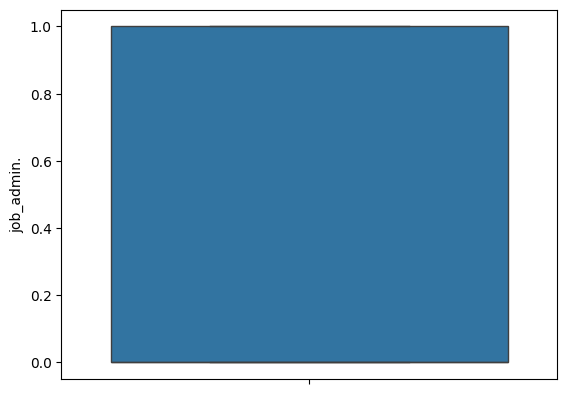

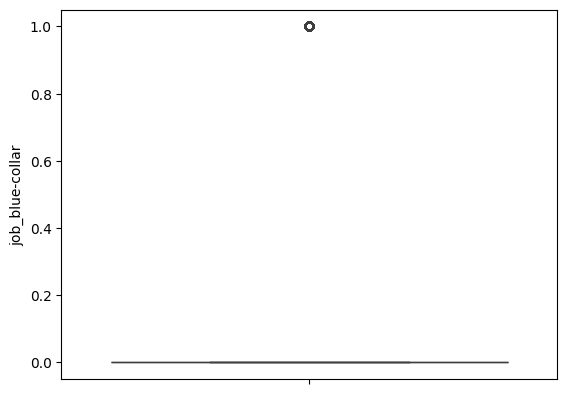

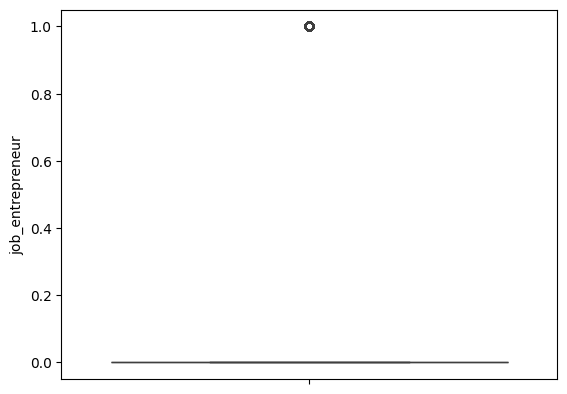

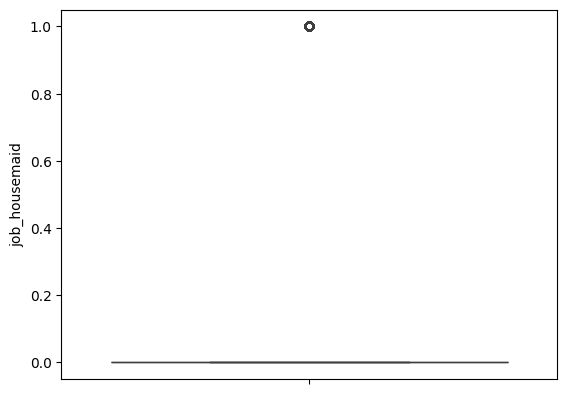

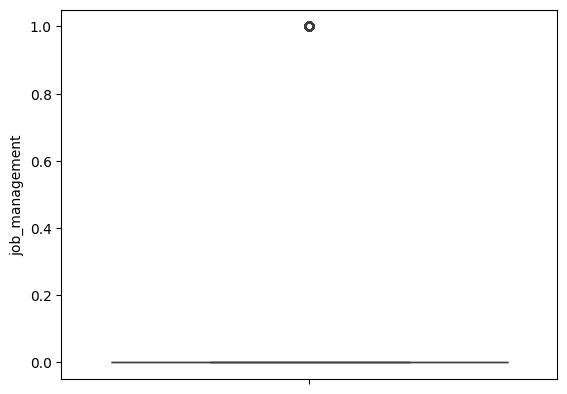

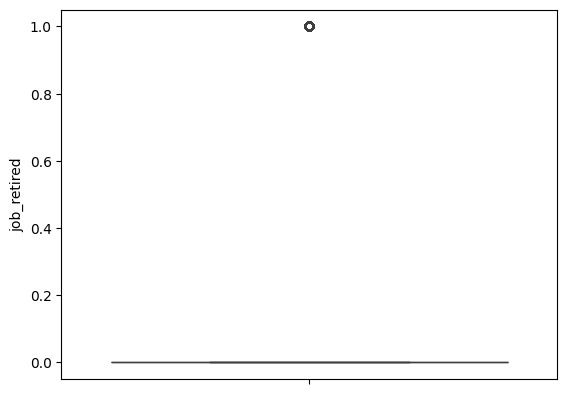

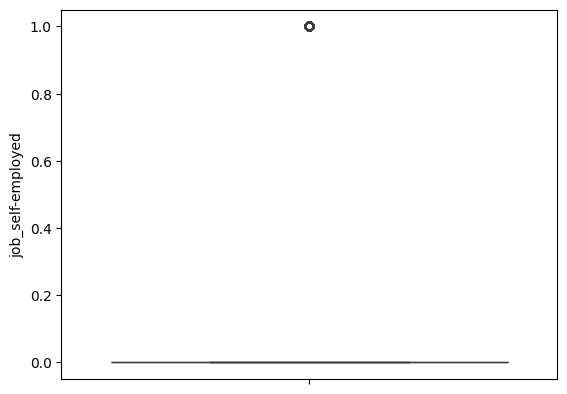

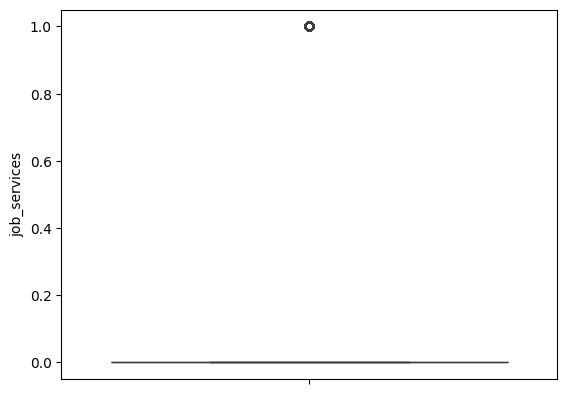

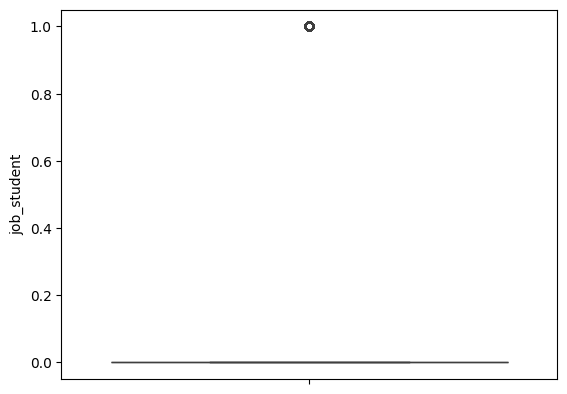

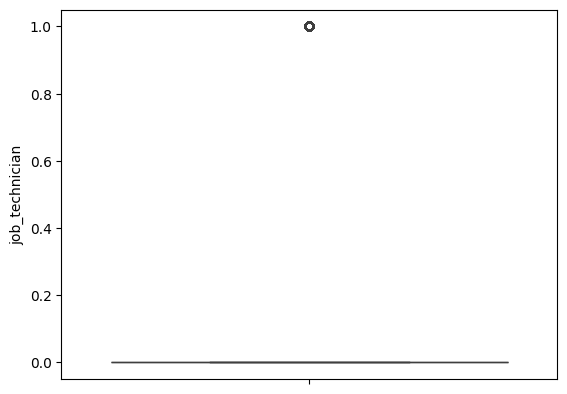

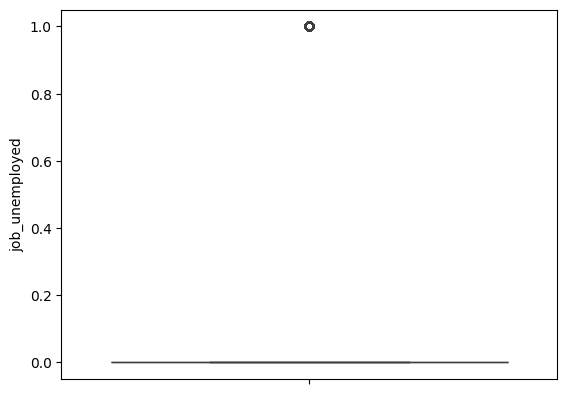

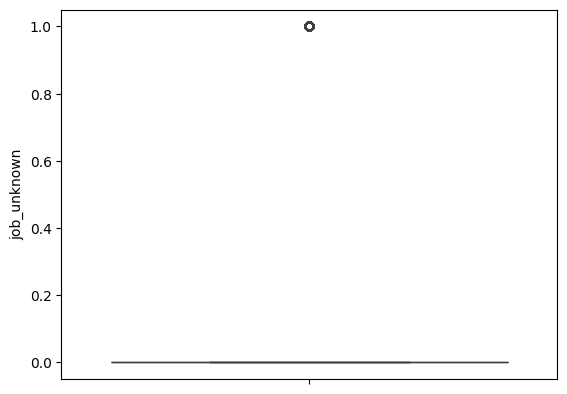

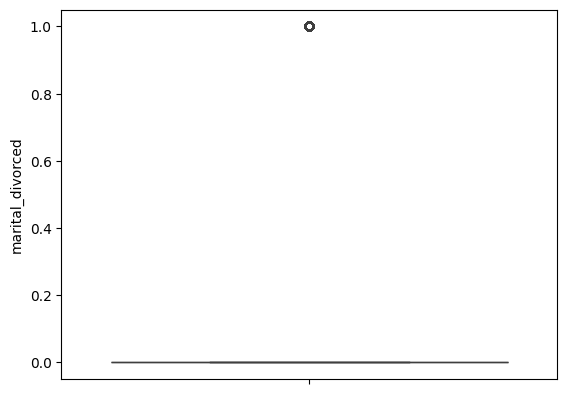

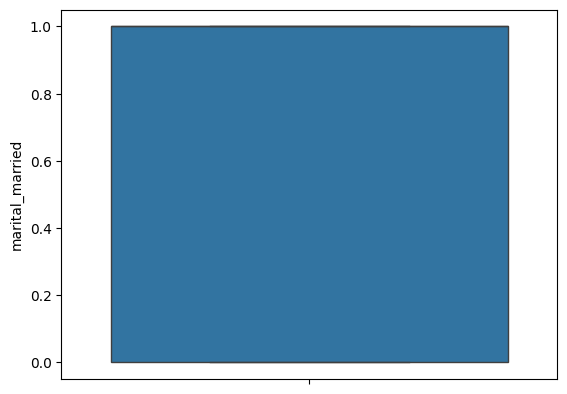

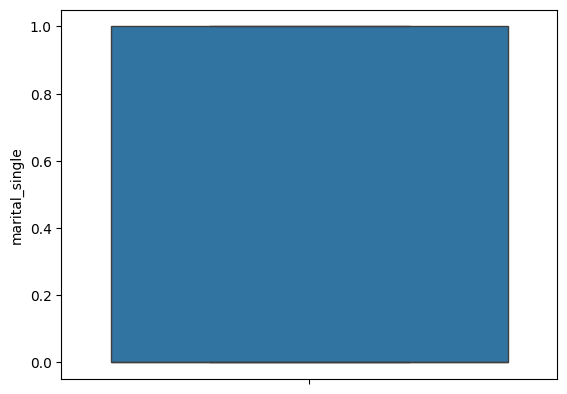

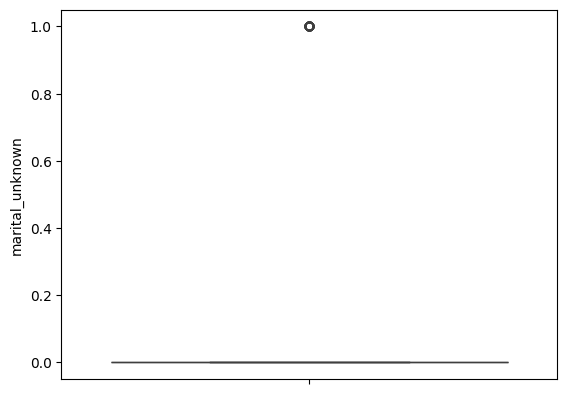

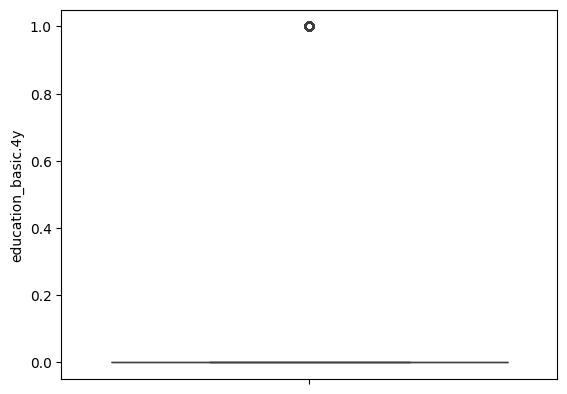

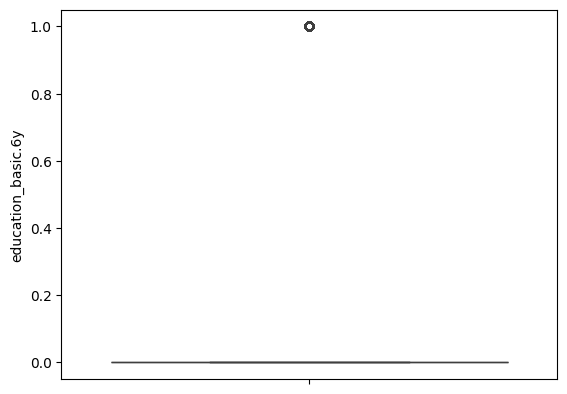

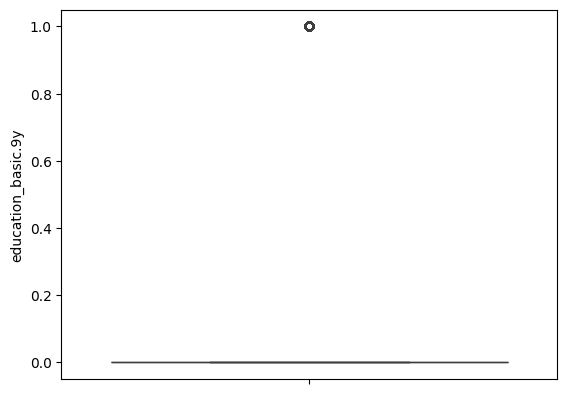

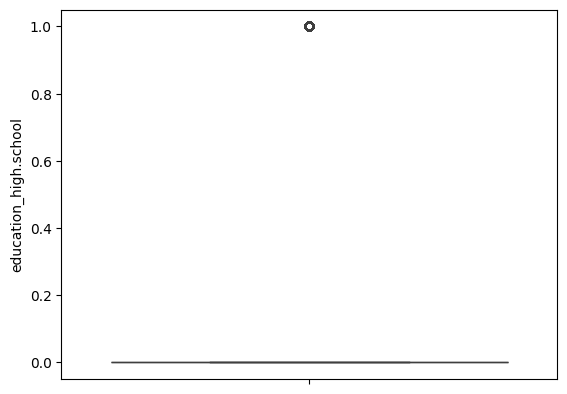

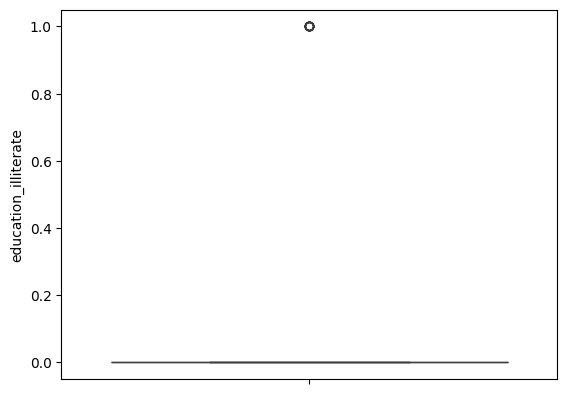

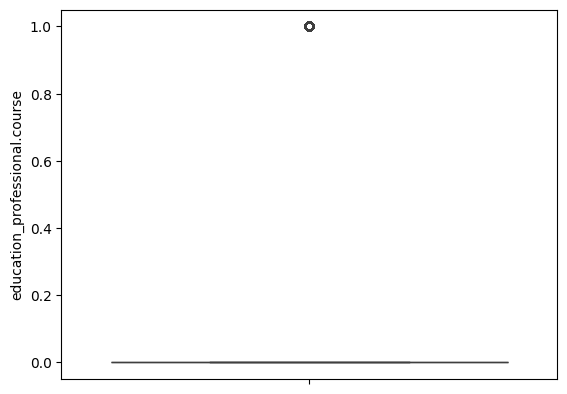

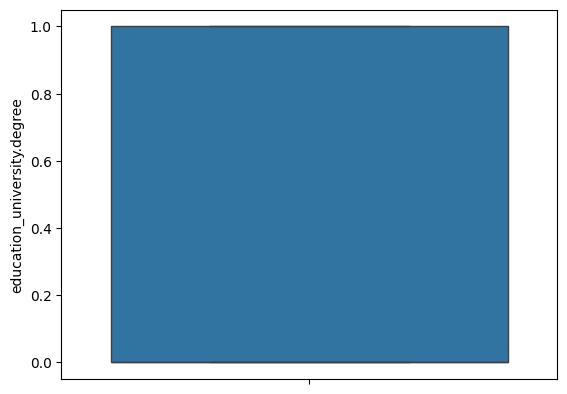

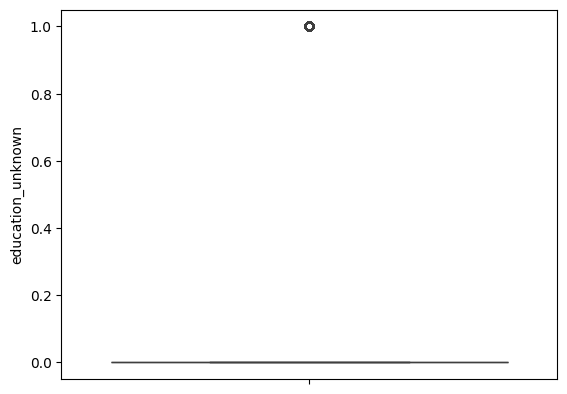

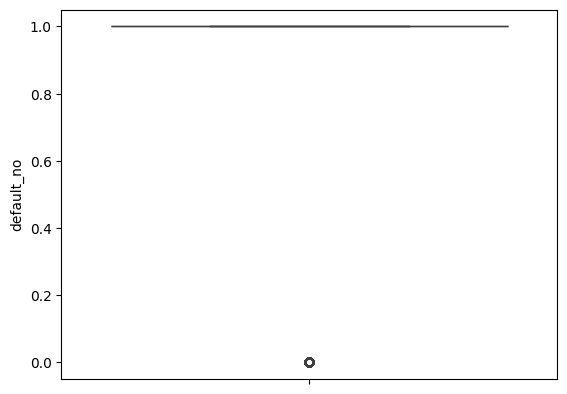

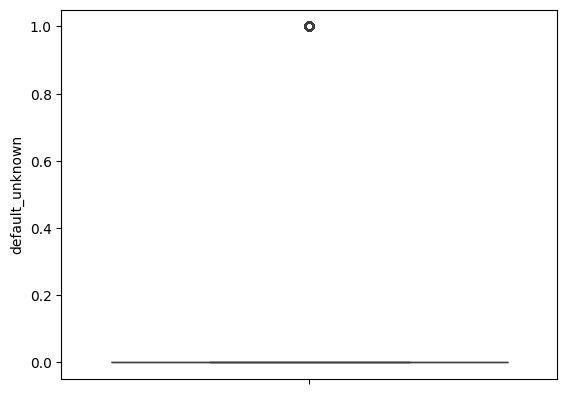

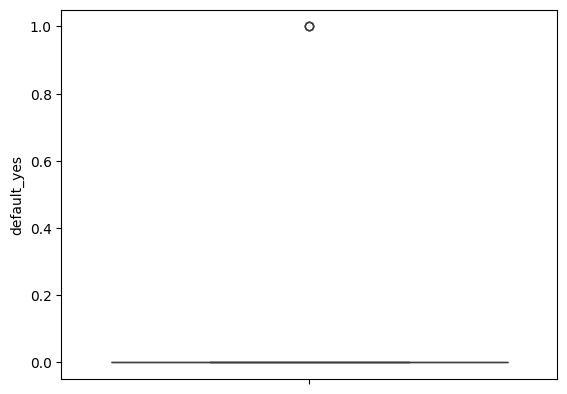

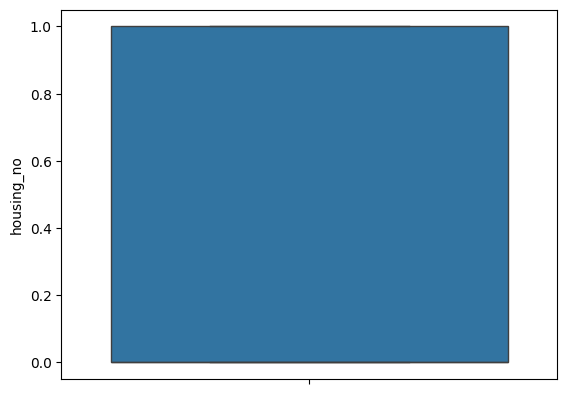

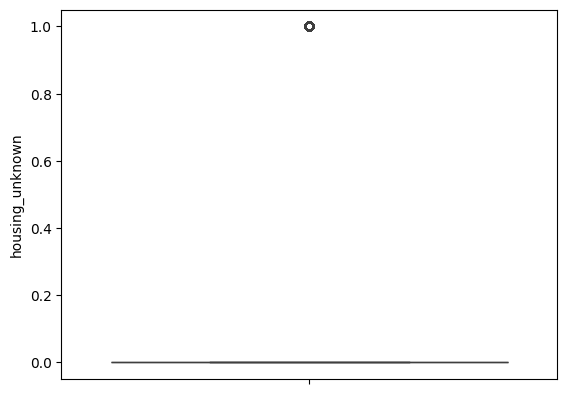

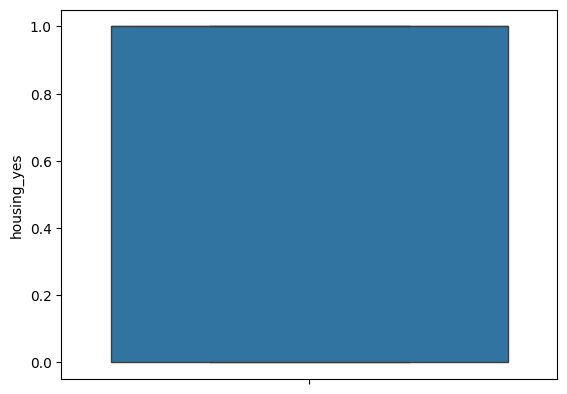

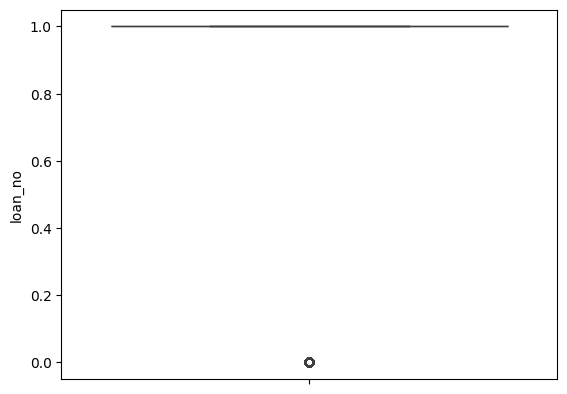

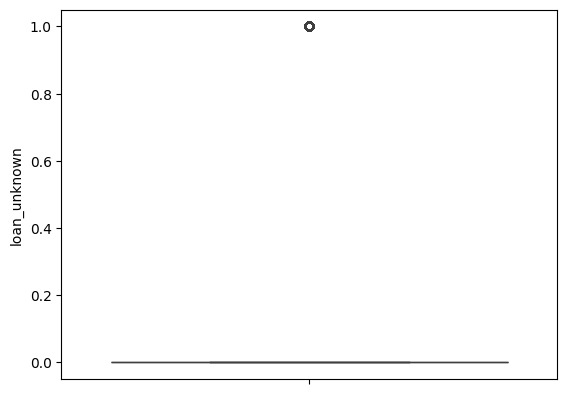

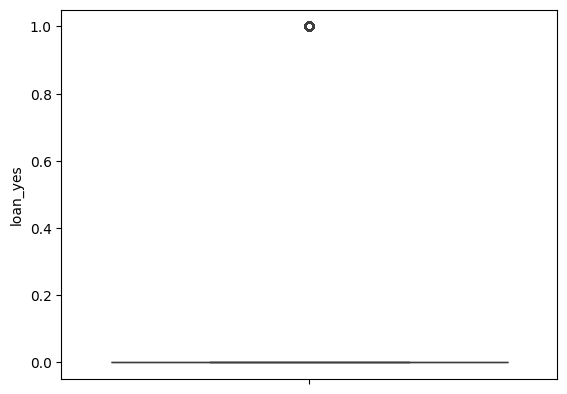

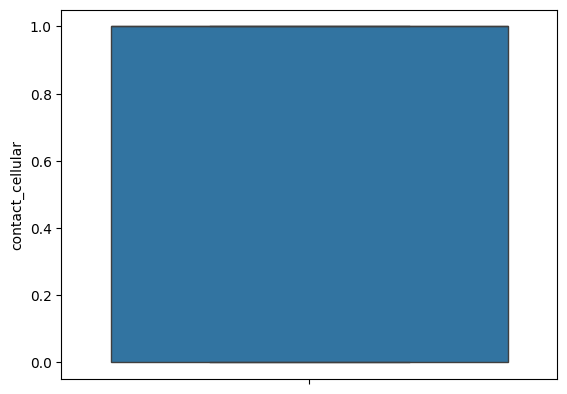

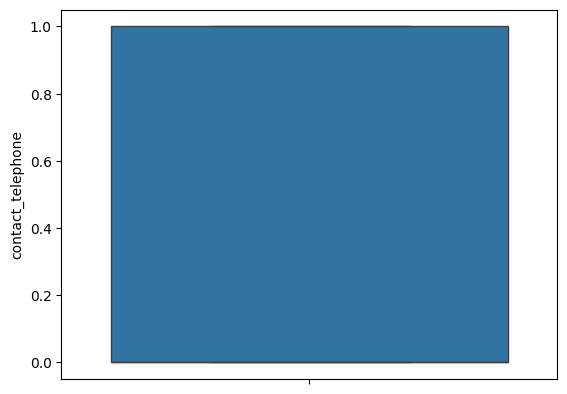

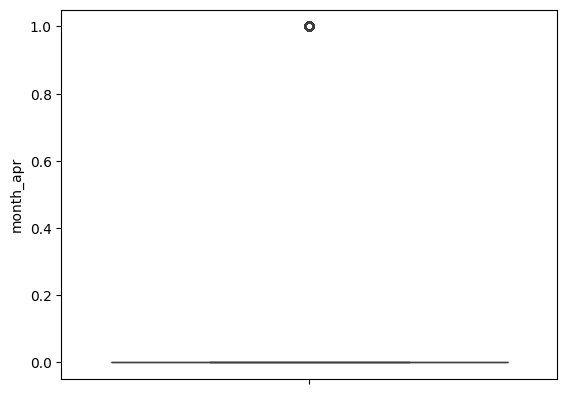

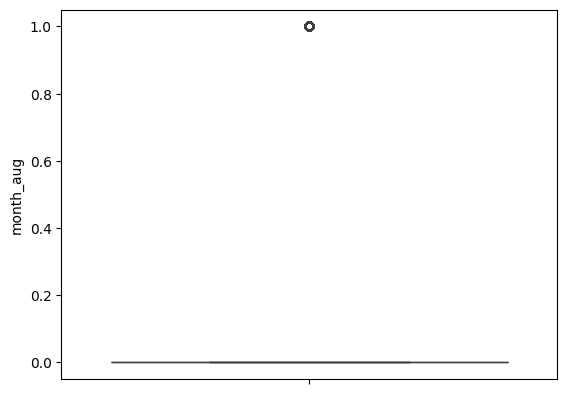

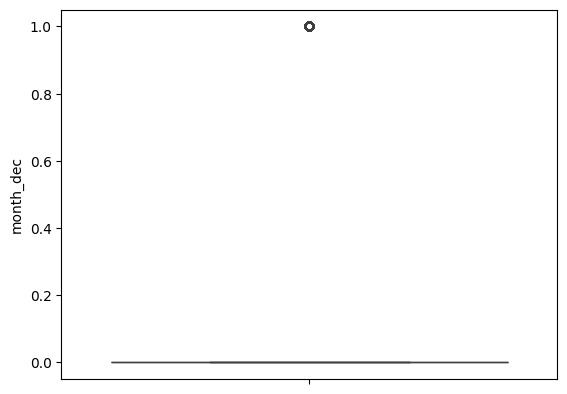

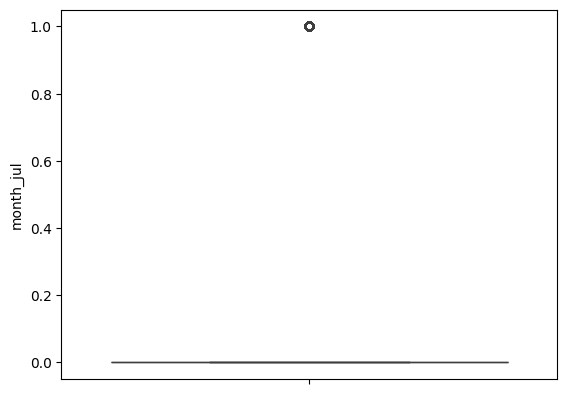

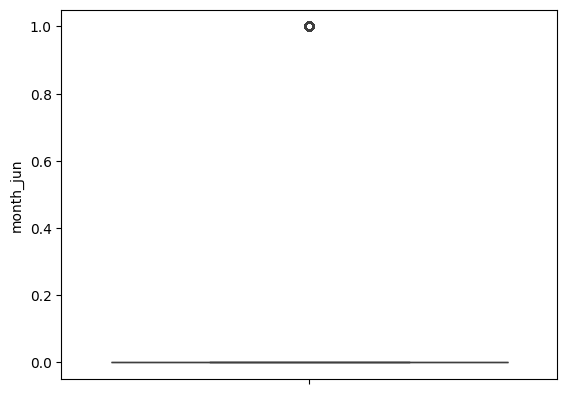

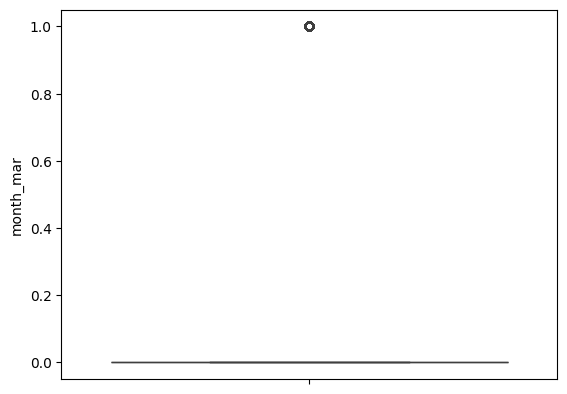

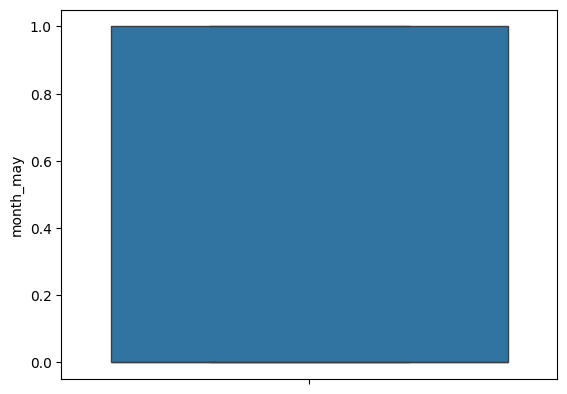

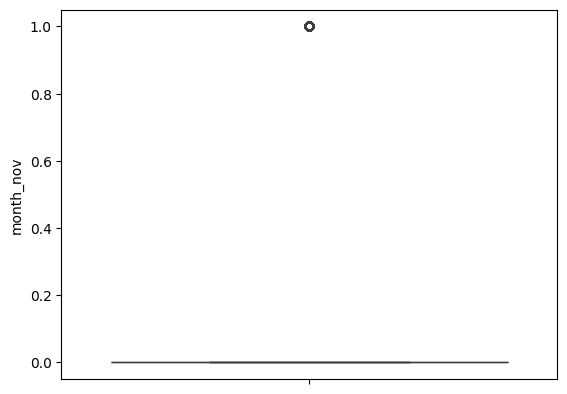

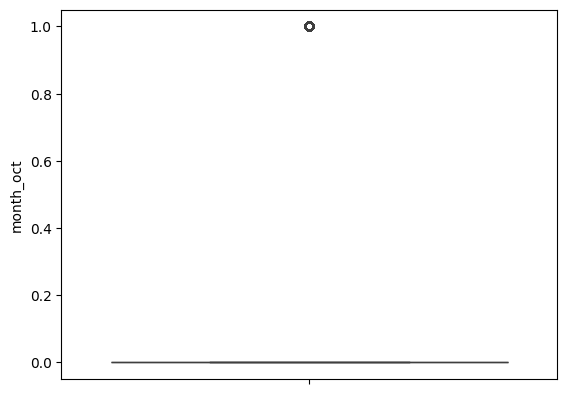

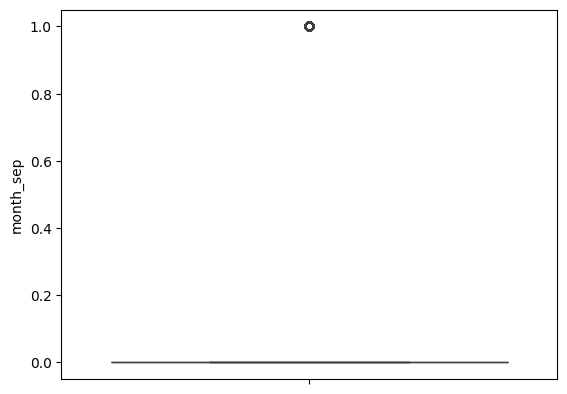

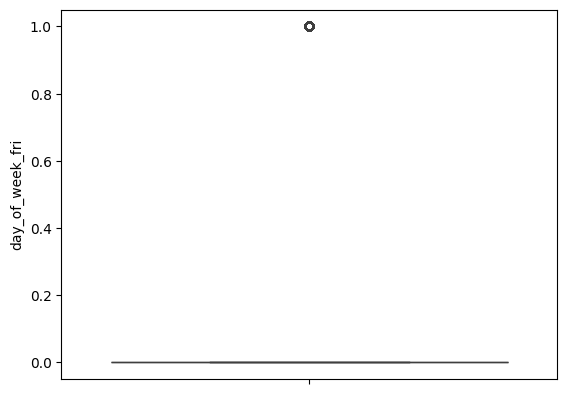

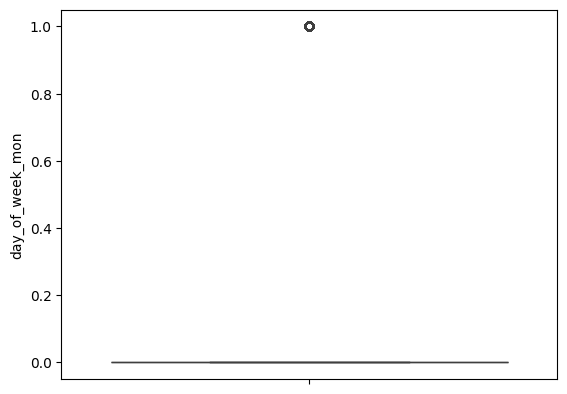

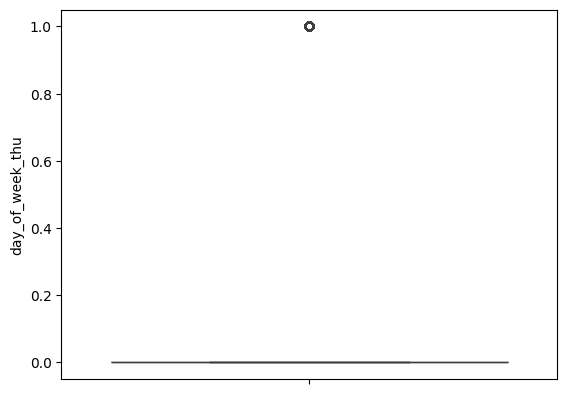

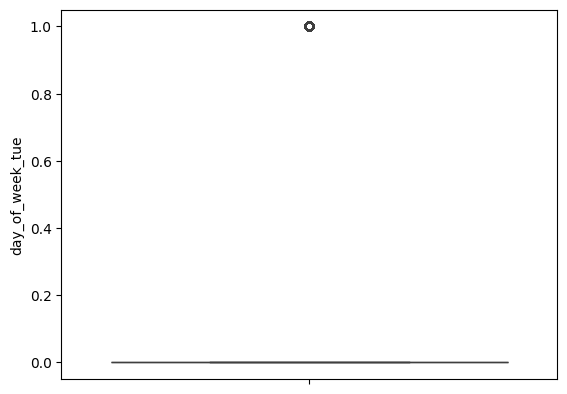

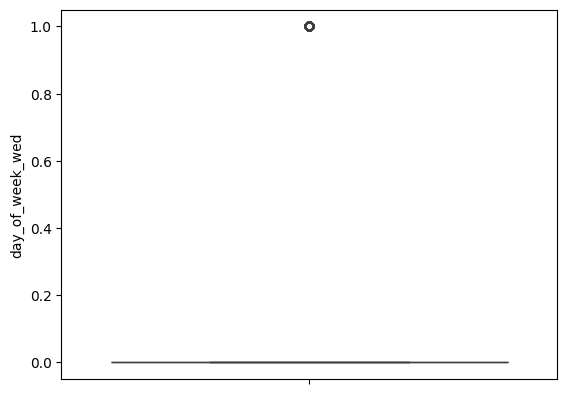

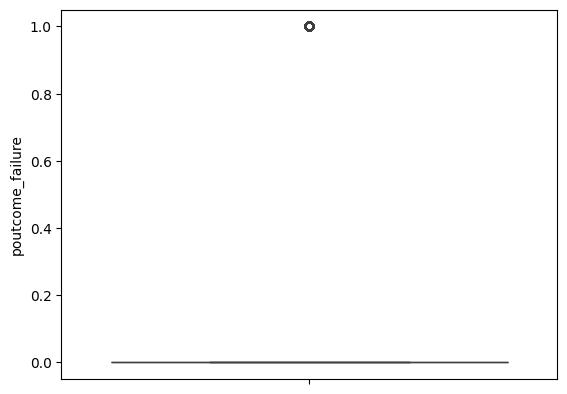

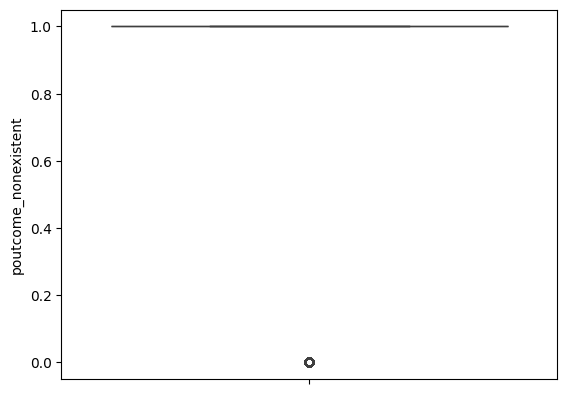

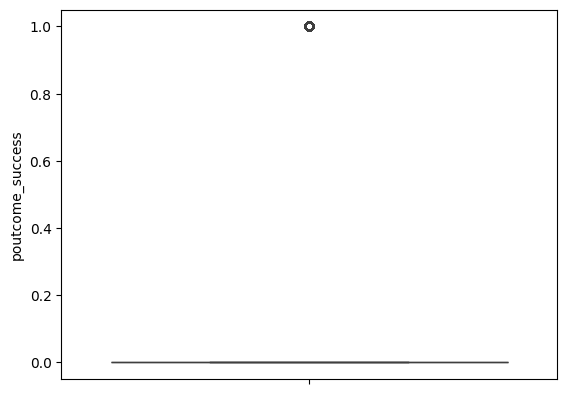

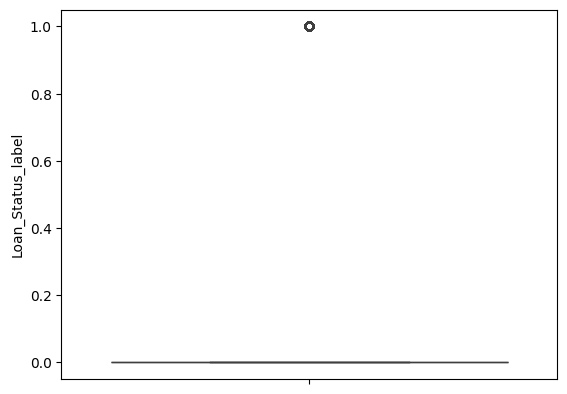

In [10]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [11]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print(f'Q1: \n{Q1}\n')
print(f'Q3: \n{Q3}\n')
print(f'IQR: \n{IQR}')

Q1: 
age                               32.0
campaign                           1.0
pdays                            999.0
previous                           0.0
no_previous_contact                1.0
not_working                        0.0
job_admin.                         0.0
job_blue-collar                    0.0
job_entrepreneur                   0.0
job_housemaid                      0.0
job_management                     0.0
job_retired                        0.0
job_self-employed                  0.0
job_services                       0.0
job_student                        0.0
job_technician                     0.0
job_unemployed                     0.0
job_unknown                        0.0
marital_divorced                   0.0
marital_married                    0.0
marital_single                     0.0
marital_unknown                    0.0
education_basic.4y                 0.0
education_basic.6y                 0.0
education_basic.9y                 0.0
education_high.schoo

In [12]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Lower Limit: \n{lower_bound}\n')
print(f'Upper Limit: \n{upper_bound}\n')

Lower Limit: 
age                                9.5
campaign                          -2.0
pdays                            999.0
previous                           0.0
no_previous_contact                1.0
not_working                        0.0
job_admin.                        -1.5
job_blue-collar                    0.0
job_entrepreneur                   0.0
job_housemaid                      0.0
job_management                     0.0
job_retired                        0.0
job_self-employed                  0.0
job_services                       0.0
job_student                        0.0
job_technician                     0.0
job_unemployed                     0.0
job_unknown                        0.0
marital_divorced                   0.0
marital_married                   -1.5
marital_single                    -1.5
marital_unknown                    0.0
education_basic.4y                 0.0
education_basic.6y                 0.0
education_basic.9y                 0.0
education_h

In [13]:
df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
df

age  campaign  pdays  previous  no_previous_contact  not_working  \
0       56         1    999         0                    1            0   
1       57         1    999         0                    1            0   
2       37         1    999         0                    1            0   
3       40         1    999         0                    1            0   
4       56         1    999         0                    1            0   
...    ...       ...    ...       ...                  ...          ...   
41183   73         1    999         0                    1            1   
41184   46         1    999         0                    1            0   
41185   56         2    999         0                    1            1   
41186   44         1    999         0                    1            0   
41187   74         3    999         1                    1            1   

       job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  ...  \
0               0                0                 0              1  ...   
1               0                0                 0              0  ...   
2               0                0                 0              0  ...   
3               1                0                 0              0  ...   
4               0                0                 0              0  ...   
...           ...              ...               ...            ...  ...   
41183           0                0                 0              0  ...   
41184           0                1                 0              0  ...   
41185           0                0                 0              0  ...   
41186           0                0                 0              0  ...   
41187           0                0                 0              0  ...   

       month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  \
0              0                0                1                0   
1              0                0                1                0   
2              0                0                1                0   
3              0                0                1                0   
4              0                0                1                0   
...          ...              ...              ...              ...   
41183          0                1                0                0   
41184          0                1                0                0   
41185          0                1                0                0   
41186          0                1                0                0   
41187          0                1                0                0   

       day_of_week_tue  day_of_week_wed  poutcome_failure  \
0                    0                0                 0   
1                    0                0                 0   
2                    0                0                 0   
3                    0                0                 0   
4                    0                0                 0   
...                ...              ...               ...   
41183                0                0                 0   
41184                0                0                 0   
41185                0                0                 0   
41186                0                0                 0   
41187                0                0                 1   

       poutcome_nonexistent  poutcome_success  Loan_Status_label  
0                         1                 0                  0  
1                         1                 0                  0  
2                         1                 0                  0  
3                         1                 0                  0  
4                         1                 0                  0  
...                     ...               ...                ...  
41183                     1                 0                  1  
41184                     1                 0                  0  
4118

<Axes: >

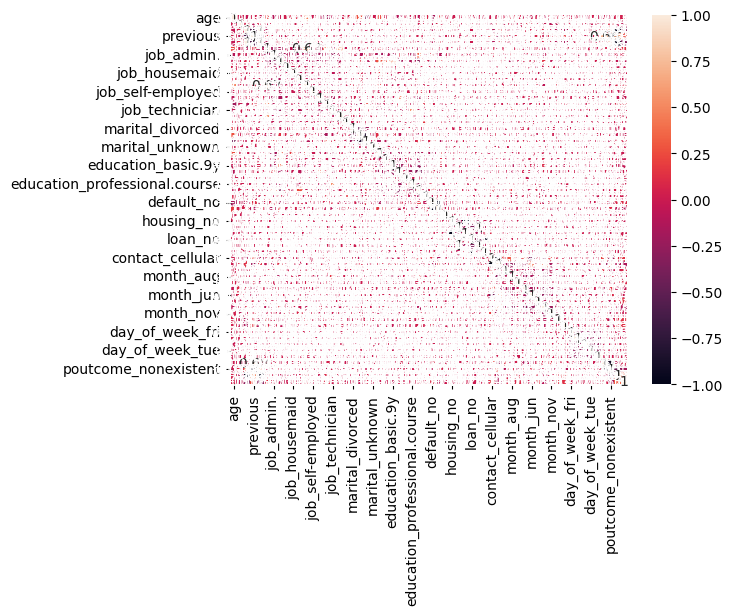

In [14]:
sns.heatmap(df.corr(), annot=True)

In [15]:
X = df.drop('Loan_Status_label', axis=1)
y = df['Loan_Status_label']

In [16]:
X

age  campaign  pdays  previous  no_previous_contact  not_working  \
0       56         1    999         0                    1            0   
1       57         1    999         0                    1            0   
2       37         1    999         0                    1            0   
3       40         1    999         0                    1            0   
4       56         1    999         0                    1            0   
...    ...       ...    ...       ...                  ...          ...   
41183   73         1    999         0                    1            1   
41184   46         1    999         0                    1            0   
41185   56         2    999         0                    1            1   
41186   44         1    999         0                    1            0   
41187   74         3    999         1                    1            1   

       job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  ...  \
0               0                0                 0              1  ...   
1               0                0                 0              0  ...   
2               0                0                 0              0  ...   
3               1                0                 0              0  ...   
4               0                0                 0              0  ...   
...           ...              ...               ...            ...  ...   
41183           0                0                 0              0  ...   
41184           0                1                 0              0  ...   
41185           0                0                 0              0  ...   
41186           0                0                 0              0  ...   
41187           0                0                 0              0  ...   

       month_oct  month_sep  day_of_week_fri  day_of_week_mon  \
0              0          0                0                1   
1              0          0                0                1   
2              0          0                0                1   
3              0          0                0                1   
4              0          0                0                1   
...          ...        ...              ...              ...   
41183          0          0                1                0   
41184          0          0                1                0   
41185          0          0                1                0   
41186          0          0                1                0   
41187          0          0                1                0   

       day_of_week_thu  day_of_week_tue  day_of_week_wed  poutcome_failure  \
0                    0                0                0                 0   
1                    0                0                0                 0   
2                    0                0                0                 0   
3                    0                0                0                 0   
4                    0                0                0                 0   
...                ...              ...              ...               ...   
41183                0                0                0                 0   
41184                0                0                0                 0   
41185                0                0                0                 0   
41186                0                0                0                 0   
41187                0                0                0                 1   

       poutcome_nonexistent  poutcome_success  
0                         1                 0  
1                         1                 0  
2                         1                 0  
3                         1                 0  
4                         1                 0  
...                     ...               ...  
41183                     1                 0  
41184                     1                 0  
41185                     1                

In [17]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: Loan_Status_label, Length: 41188, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train

age  campaign  pdays  previous  no_previous_contact  not_working  \
12556   40         2    999         0                    1            0   
35451   31         4    999         0                    1            0   
30592   59         6    999         1                    1            1   
17914   43         5    999         0                    1            0   
3315    39         2    999         0                    1            0   
...    ...       ...    ...       ...                  ...          ...   
6265    58         2    999         0                    1            1   
11284   37         1    999         0                    1            0   
38158   35         1      4         1                    0            0   
860     40         2    999         0                    1            0   
15795   29         2    999         0                    1            0   

       job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  ...  \
12556           0                1                 0              0  ...   
35451           1                0                 0              0  ...   
30592           0                0                 0              0  ...   
17914           0                0                 0              1  ...   
3315            1                0                 0              0  ...   
...           ...              ...               ...            ...  ...   
6265            0                0                 0              0  ...   
11284           0                0                 0              0  ...   
38158           1                0                 0              0  ...   
860             0                0                 0              0  ...   
15795           1                0                 0              0  ...   

       month_oct  month_sep  day_of_week_fri  day_of_week_mon  \
12556          0          0                0                1   
35451          0          0                0                1   
30592          0          0                0                1   
17914          0          0                0                0   
3315           0          0                0                0   
...          ...        ...              ...              ...   
6265           0          0                0                0   
11284          0          0                0                0   
38158          1          0                0                0   
860            0          0                0                0   
15795          0          0                0                1   

       day_of_week_thu  day_of_week_tue  day_of_week_wed  poutcome_failure  \
12556                0                0                0                 0   
35451                0                0                0                 0   
30592                0                0                0                 1   
17914                0                1                0                 0   
3315                 1                0                0                 0   
...                ...              ...              ...               ...   
6265                 0                1                0                 0   
11284                1                0                0                 0   
38158                1                0                0                 0   
860                  0                0                1                 0   
15795                0                0                0                 0   

       poutcome_nonexistent  poutcome_success  
12556                     1                 0  
35451                     1                 0  
30592                     0                 0  
17914                     1                 0  
3315                      1                 0  
...                     ...               ...  
6265                      1                 0  
11284                     1                 0  
38158                     0                

In [20]:
y_train

12556    0
35451    0
30592    0
17914    0
3315     0
        ..
6265     0
11284    0
38158    1
860      0
15795    0
Name: Loan_Status_label, Length: 32950, dtype: int64

# Model Selction




## Using Liner Regression

In [41]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [42]:
print(f'Training Accuracy : {round(dtree.score(X_train, y_train), 2)*100}%')

Training Accuracy : 96.0%


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

In [26]:
lr.score(X_train, y_train)

0.8981487101669196

In [27]:
print(f'Training Accuracy : {round(lr.score(X_train, y_train), 2)*100}%')
print(f'Testing Accuracy : {round(lr.score(X_test, y_test), 2)*100}%')

Training Accuracy : 90.0%
Testing Accuracy : 90.0%


In [28]:
dtree = DecisionTreeClassifier(max_depth= 9)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9)

In [29]:
dtree.score(X_train, y_train)

0.9084370257966616

In [30]:
print(f'Training Accuracy : {round(dtree.score(X_train, y_train), 2)*100}%')
print(f'Testing Accuracy : {round(dtree.score(X_test, y_test), 2)*100}%')

Training Accuracy : 91.0%
Testing Accuracy : 89.0%


In [31]:
gboost = GradientBoostingRegressor()
gboost.fit(X_train, y_train)

GradientBoostingRegressor()

In [32]:
gboost.score(X_train, y_train)

0.21635903249041055

# Model Prediction

In [33]:
y_pred_train = dtree.predict(X_train)
y_pred_test = dtree.predict(X_test)

In [34]:
accuracy_score(y_train, y_pred_train)

0.9084370257966616

In [35]:
confusion_matrix(y_train, y_pred_train)

array([[28958,   287],
       [ 2730,   975]])

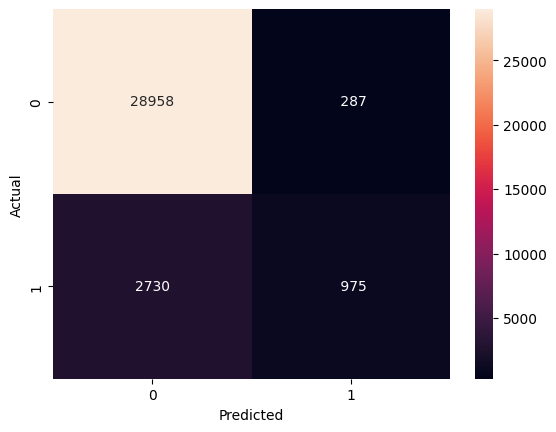

In [36]:
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='4g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [37]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     29245
           1       0.77      0.26      0.39      3705

    accuracy                           0.91     32950
   macro avg       0.84      0.63      0.67     32950
weighted avg       0.90      0.91      0.89     32950

